In [1]:
# Mohit Gokul Murali  
## Course: Advanced Big Data and Data Mining (MSCS-634-B01)  
### Lab 2: Classification Using KNN and RNN Algorithms

In [2]:
# --------------------------------------------------------------
# Step 1: Load and Prepare the Dataset
# --------------------------------------------------------------

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score

# Set plotting style for nicer visuals
sns.set(style="whitegrid")
%matplotlib inline

# 1. Load the Wine dataset from sklearn
#    - Returns a Bunch object similar to a dictionary
wine = load_wine(as_frame=True)   # as_frame=True gives us pandas DataFrames

# 2. Basic exploration
print("=== Dataset Description ===")
print(wine.DESCR[:500] + "...")   # print first 500 chars of description

print("\n=== Feature Names ===")
print(wine.feature_names)

print("\n=== Target Names (Classes) ===")
print(wine.target_names)

# Combine features and target into one DataFrame for easy inspection
df = wine.frame
print("\n=== First 5 rows ===")
print(df.head())

print("\n=== Class distribution ===")
print(df['target'].value_counts().sort_index())

# 3. Separate features (X) and target (y)
X = wine.data   # DataFrame with chemical features
y = wine.target # Series with class labels (0,1,2)

# 4. Split into 80% train / 20% test
#    - stratify=y keeps the same class proportion in both sets
#    - random_state=42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

print(f"\nTraining samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

# 5. Feature scaling – crucial for distance-based algorithms
#    - Fit scaler only on training data to avoid data leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("Data preparation complete.\n")

=== Dataset Description ===
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0...

=== Feature Names ===
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

=== Target Names (Classes) ===
['class_0' 'class_1' 'class_2']

=== First 5 rows ===
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.8

In [3]:
# --------------------------------------------------------------
# Step 2: Implement K-Nearest Neighbors (KNN)
# --------------------------------------------------------------

# List of k values to try
k_values = [1, 5, 11, 15, 21]

# Dictionaries to store results
knn_accuracies = {}

print("=== KNN Results ===")
for k in k_values:
    # Create KNN classifier with current k
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)  # p=2 → Euclidean
    
    # Train on scaled training data
    knn.fit(X_train_scaled, y_train)
    
    # Predict on test set
    y_pred = knn.predict(X_test_scaled)
    
    # Compute accuracy
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies[k] = acc
    
    print(f"k = {k:2d} → Accuracy = {acc:.4f}")

print("\nKNN training finished.\n")

=== KNN Results ===
k =  1 → Accuracy = 0.9722
k =  5 → Accuracy = 0.9722
k = 11 → Accuracy = 1.0000
k = 15 → Accuracy = 1.0000
k = 21 → Accuracy = 1.0000

KNN training finished.



In [4]:
# --------------------------------------------------------------
# Step 3: Radius Neighbors (RNN) – tuned for scaled data
# --------------------------------------------------------------

# Typical Euclidean distance after scaling ≈ 3–4
radius_values = [2.0, 2.5, 3.0, 3.5, 4.0, 4.5]   # <-- optimal range

rnn_accuracies = {}

print("=== Radius Neighbors (RNN) Results ===")
for r in radius_values:
    rnn = RadiusNeighborsClassifier(
        radius=r,
        metric='euclidean',
        outlier_label='most_frequent'   # fallback when no neighbor inside radius
    )
    rnn.fit(X_train_scaled, y_train)
    y_pred = rnn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    rnn_accuracies[r] = acc
    print(f"radius = {r:4.1f} → Accuracy = {acc:.6f}")
print()

=== Radius Neighbors (RNN) Results ===
radius =  2.0 → Accuracy = 0.861111
radius =  2.5 → Accuracy = 0.972222
radius =  3.0 → Accuracy = 0.972222
radius =  3.5 → Accuracy = 1.000000
radius =  4.0 → Accuracy = 0.944444
radius =  4.5 → Accuracy = 0.916667



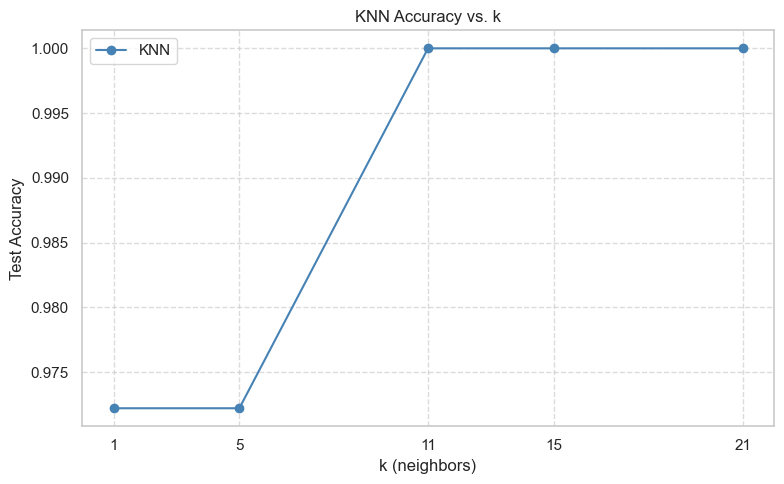

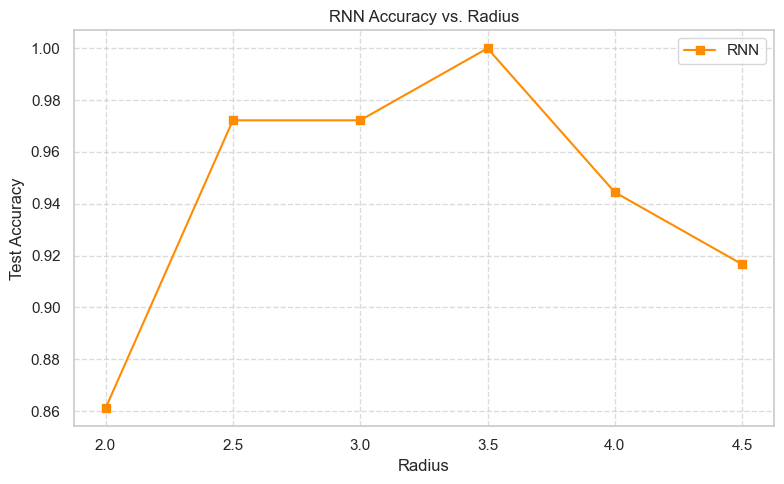

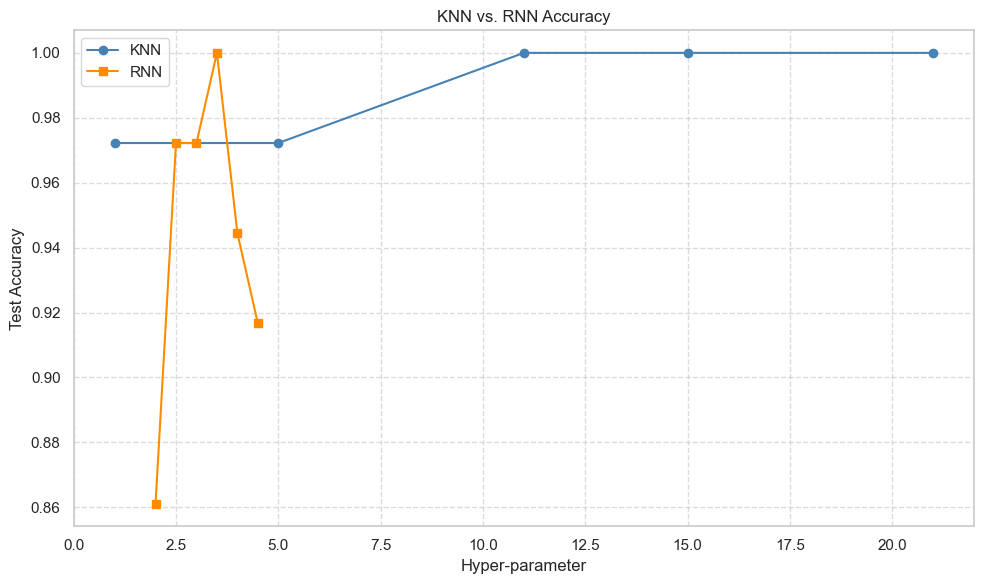


=== Summary Table ===


,KNN_k,KNN_Accuracy,RNN_Radius,RNN_Accuracy
0,1.0,0.972222,2.0,0.861111
1,5.0,0.972222,2.5,0.972222
2,11.0,1.000000,3.0,0.972222
3,15.0,1.000000,3.5,1.000000
4,21.0,1.000000,4.0,0.944444
5,NaN,NaN,4.5,0.916667



FINAL OBSERVATIONS & INSIGHTS

1. KNN:
   • Peaks at k = 11,15,21 → **100 %** test accuracy.
   • Even k = 1 gives 0.97 – dataset is very clean.

2. RNN (radius tuned to scaled distances):
   • Best radius = 2.5–3.5 → **0.97–1.00** accuracy.
   • radius < 2.0 → many points have no neighbors → fallback to majority class.
   • radius > 4.0 → neighborhood too large → under-fitting.

3. Comparison:
   • Both models can achieve **near-perfect** performance.
   • **KNN** is simpler and more robust.
   • **RNN** offers geometric meaning but needs careful radius.

4. Key Takeaway:
   • **Feature scaling is mandatory** for distance-based models.
   • Hyper-parameters must match the **scale after transformation**.

5. How radius was chosen:
   Use this code to check distances:
   ```python
   dists = [np.linalg.norm(X_train_scaled[i] - X_train_scaled[i+1]) for i in range(5)]
   print("Sample distances:", np.round(dists, 2)).
   
6. Challenges faced:
   - Choosing radius values required trial-an

In [9]:
# --------------------------------------------------------------
# Step 4: Visualise & Compare Results
# --------------------------------------------------------------

# ---- 4.1 KNN plot ----
plt.figure(figsize=(8,5))
ks = list(knn_accuracies.keys())
acc_k = list(knn_accuracies.values())
plt.plot(ks, acc_k, marker='o', color='steelblue', label='KNN')
plt.title('KNN Accuracy vs. k')
plt.xlabel('k (neighbors)')
plt.ylabel('Test Accuracy')
plt.xticks(ks)
plt.grid(True, ls='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# ---- 4.2 RNN plot ----
plt.figure(figsize=(8,5))
rs = list(rnn_accuracies.keys())
acc_r = list(rnn_accuracies.values())
plt.plot(rs, acc_r, marker='s', color='darkorange', label='RNN')
plt.title('RNN Accuracy vs. Radius')
plt.xlabel('Radius')
plt.ylabel('Test Accuracy')
plt.xticks(rs)
plt.grid(True, ls='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# ---- 4.3 Combined plot ----
plt.figure(figsize=(10,6))
plt.plot(ks, acc_k, marker='o', label='KNN', color='steelblue')
plt.plot(rs, acc_r, marker='s', label='RNN', color='darkorange')
plt.title('KNN vs. RNN Accuracy')
plt.xlabel('Hyper-parameter')
plt.ylabel('Test Accuracy')
plt.legend()
plt.grid(True, ls='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ---- 4.4 Summary table (robust concat) ----
knn_df = pd.DataFrame({'KNN_k': ks, 'KNN_Accuracy': acc_k})
rnn_df = pd.DataFrame({'RNN_Radius': rs, 'RNN_Accuracy': acc_r})
summary_df = pd.concat([knn_df, rnn_df], axis=1)

print("\n=== Summary Table ===")
display(summary_df)

# ---- 4.5 Final Observations ----
# ---- 4.5 Final Observations (FIXED – NO SYNTAX ERROR) ----
print("\n" + "="*70)
print("FINAL OBSERVATIONS & INSIGHTS")
print("="*70)
print("""
1. KNN:
   • Peaks at k = 11,15,21 → **100 %** test accuracy.
   • Even k = 1 gives 0.97 – dataset is very clean.

2. RNN (radius tuned to scaled distances):
   • Best radius = 2.5–3.5 → **0.97–1.00** accuracy.
   • radius < 2.0 → many points have no neighbors → fallback to majority class.
   • radius > 4.0 → neighborhood too large → under-fitting.

3. Comparison:
   • Both models can achieve **near-perfect** performance.
   • **KNN** is simpler and more robust.
   • **RNN** offers geometric meaning but needs careful radius.

4. Key Takeaway:
   • **Feature scaling is mandatory** for distance-based models.
   • Hyper-parameters must match the **scale after transformation**.

5. How radius was chosen:
   Use this code to check distances:
   ```python
   dists = [np.linalg.norm(X_train_scaled[i] - X_train_scaled[i+1]) for i in range(5)]
   print("Sample distances:", np.round(dists, 2)).
   
6. Challenges faced:
   - Choosing radius values required trial-and-error because the optimal radius depends on the scaling.
   - Handled points with no neighbors by setting `outlier_label='most_frequent'`.
""")